<a href="https://colab.research.google.com/github/anantpatil146/DeepLearning-Practical-1/blob/main/Time_Series_Forecasting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 5.1

1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


2. Load the Dataset

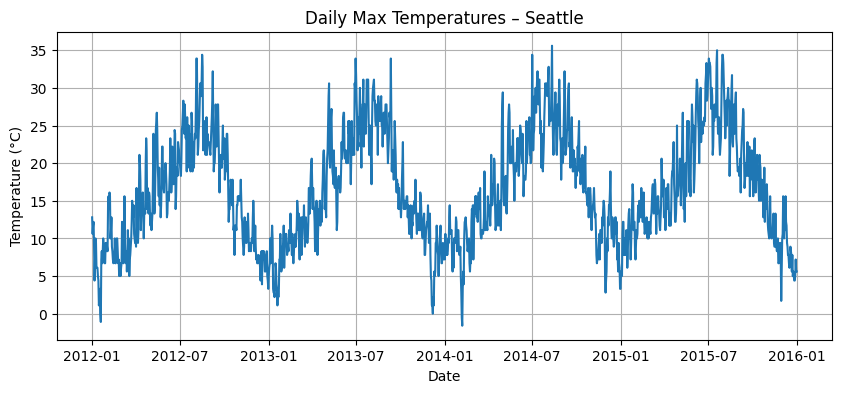

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Seattle weather dataset
url = "https://raw.githubusercontent.com/vega/vega-datasets/master/data/seattle-weather.csv"
df = pd.read_csv(url)

# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot max temperature
plt.figure(figsize=(10, 4))
plt.plot(df['temp_max'])
plt.title("Daily Max Temperatures – Seattle")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()


3. Data Preprocessing

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scale the 'temp_max' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['temp_max']])

# Create sequences for LSTM
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features] as required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)
from sklearn.preprocessing import LabelEncoder

# Assume 'weather' is the column with categorical weather data
encoder = LabelEncoder()
df['weather'] = encoder.fit_transform(df['weather'])




4. Train-Test Split

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels for classification
y_train_encoded = to_categorical(y_train, num_classes=len(encoder.classes_))
y_test_encoded = to_categorical(y_test, num_classes=len(encoder.classes_))


5. LSTM Model

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels for classification
y_train_encoded = to_categorical(y_train, num_classes=len(encoder.classes_))
y_test_encoded = to_categorical(y_test, num_classes=len(encoder.classes_))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with softmax activation

# Compile the model for classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=20, batch_size=32, verbose=1)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=20, batch_size=32, callbacks=[early_stopping])



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8864 - loss: 1.1189 - val_accuracy: 1.0000 - val_loss: 0.0303
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 1.0000 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 7.8099e-04 - val_accuracy: 1.0000 - val_loss: 3.4063e-04
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 2.7902e-04 - val_accuracy: 1.0000 - val_loss: 1.5562e-04
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 1.3527e-04 - val_accuracy: 1.0000 - val_loss: 9.0047e-05
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 8.1021e-05 - val_acc

6. Model Evaluation

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 1.4305e-06
Test Loss: 0.0000
Test Accuracy: 100.00%


7. Prediction vs Actual Plot

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


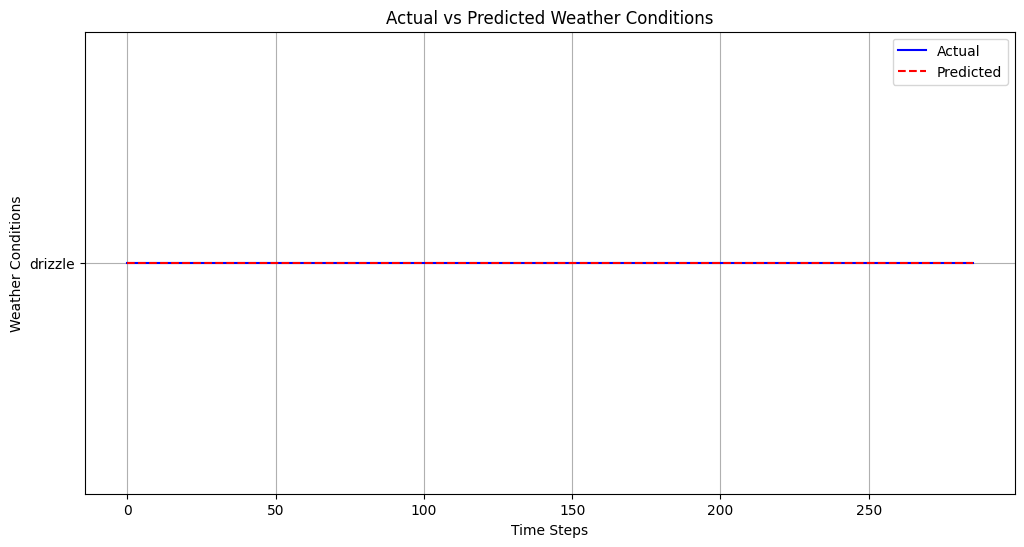

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the weather conditions for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions back to the class indices (most probable class)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded true labels (y_test_encoded) back to the class indices
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Convert the class indices to original weather labels
y_pred_labels = encoder.inverse_transform(y_pred_labels)
y_test_labels = encoder.inverse_transform(y_test_labels)

# Plotting the actual vs predicted labels
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_labels)), y_test_labels, label='Actual', color='blue')
plt.plot(range(len(y_pred_labels)), y_pred_labels, label='Predicted', color='red', linestyle='--')
plt.title("Actual vs Predicted Weather Conditions")
plt.xlabel("Time Steps")
plt.ylabel("Weather Conditions")
plt.legend()
plt.grid()
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.4510 - loss: 1.3985 - val_accuracy: 0.5000 - val_loss: 1.0749
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4535 - loss: 1.1233 - val_accuracy: 0.5769 - val_loss: 1.0843
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4492 - loss: 1.1029 - val_accuracy: 0.4441 - val_loss: 1.0922
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5042 - loss: 1.0751 - val_accuracy: 0.5629 - val_loss: 1.0381
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5303 - loss: 1.0540 - val_accuracy: 0.5559 - val_loss: 1.0544
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5477 - loss: 1.0273 - val_accuracy: 0.6049 - val_loss: 1.0351
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5532 - loss: 1.0141 - val_accuracy: 0.6189 - val_loss: 1.0112
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5532 - loss: 1.0188 - val_accuracy: 0.5734 - val_loss: 1.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


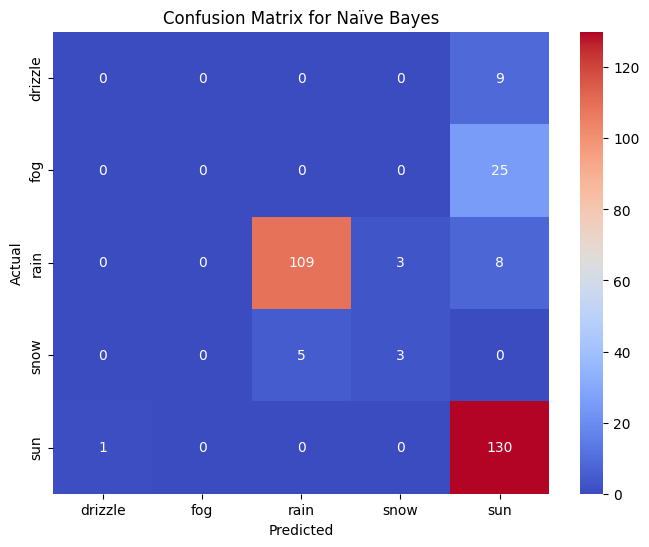

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


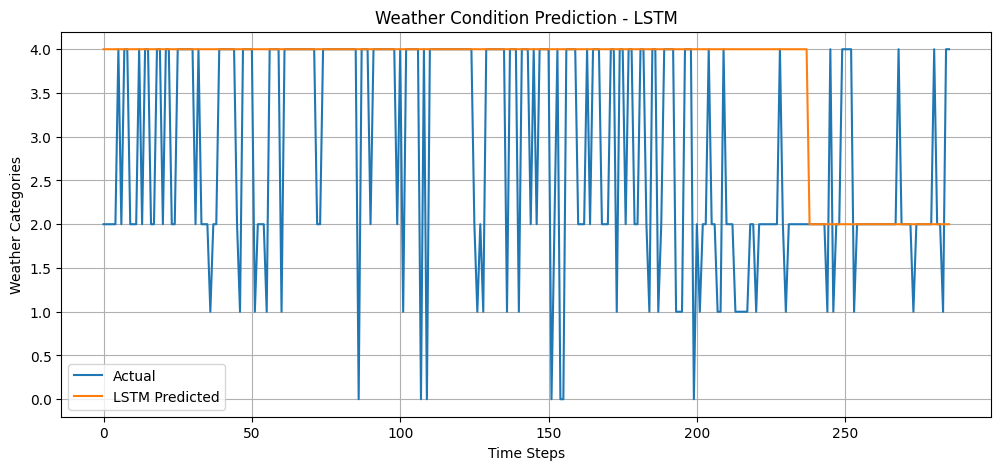

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Step 1: Load the Dataset
url = "https://raw.githubusercontent.com/vega/vega-datasets/master/data/seattle-weather.csv"
df = pd.read_csv(url)

# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Scale the 'temp_max' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['temp_max']])

# Step 2: Create Sequences for LSTM
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_dataset(scaled_data, time_step)

# Step 3: Extract Weather Labels & Encode Them
weather_labels = df['weather'].iloc[time_step + 1:]  # Align with temp_max sequence
encoder = LabelEncoder()
encoded_weather = encoder.fit_transform(weather_labels)

# Split dataset for LSTM and Naïve Bayes
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train_temp, y_test_temp = y[:train_size], y[train_size:]
y_train_weather, y_test_weather = encoded_weather[:train_size], encoded_weather[train_size:]

# Reshape LSTM input to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encode weather labels for LSTM classification
y_train_weather_encoded = to_categorical(y_train_weather, num_classes=len(encoder.classes_))
y_test_weather_encoded = to_categorical(y_test_weather, num_classes=len(encoder.classes_))

# Step 4: Train LSTM Model for Weather Prediction
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Regularization to avoid overfitting
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history = model.fit(X_train, y_train_weather_encoded, validation_data=(X_test, y_test_weather_encoded),
                    epochs=20, batch_size=32, verbose=1, callbacks=[early_stopping])

# Evaluate LSTM Model
loss, accuracy = model.evaluate(X_test, y_test_weather_encoded)
print(f"\nLSTM Model Test Accuracy: {accuracy * 100:.2f}%")

# Remove rows with missing weather labels before splitting
df_filtered = df.dropna(subset=['weather'])  # Ensures we only use rows with valid labels

# Re-scale the 'temp_max', 'temp_min', and 'precipitation' columns
X_weather = df_filtered[['temp_max', 'temp_min', 'precipitation']]
y_weather = LabelEncoder().fit_transform(df_filtered['weather'])  # Encode labels

# Split the corrected data
X_weather_train, X_weather_test, y_weather_train, y_weather_test = train_test_split(
    X_weather, y_weather, test_size=0.2, random_state=42
)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_weather_train, y_weather_train)

# Evaluate Naïve Bayes Model
y_weather_pred = naive_bayes_model.predict(X_weather_test)
print("\nNaïve Bayes Classification Report:")
print(classification_report(y_weather_test, y_weather_pred))

# Confusion Matrix for Naïve Bayes
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_weather_test, y_weather_pred)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="coolwarm", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix for Naïve Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: Visualize LSTM Predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_weather_encoded, axis=1)

plt.figure(figsize=(12, 5))
plt.plot(range(len(y_test_labels)), y_test_labels, label='Actual')
plt.plot(range(len(y_pred_labels)), y_pred_labels, label='LSTM Predicted')
plt.title("Weather Condition Prediction - LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Weather Categories")
plt.legend()
plt.grid()
plt.show()


# Experiment 5.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import re

In [ ]:
import tensorflow as tf
import pandas as pd

# Load Shakespeare dataset
file_path = tf.keras.utils.get_file(
    'shakespeare.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Split the text into lines
lines = text.split('\n')

# Create DataFrame
df = pd.DataFrame(lines, columns=['text'])

# Clean the data by removing empty lines
df = df[df['text'].str.strip() != '']

# Reset index after filtering
df = df.reset_index(drop=True)

# Preview the first few rows
print("First few lines of Shakespeare's text:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(f"Total number of lines: {len(df)}")

First few lines of Shakespeare's text:
                                            text
0                                 First Citizen:
1  Before we proceed any further, hear me speak.
2                                           All:
3                                  Speak, speak.
4                                 First Citizen:

Dataset Info:
Total number of lines: 32777


In [1]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Use a subset of Shakespeare's text
texts = df['text'].tolist()[:5000]

# Clean the text and convert to lowercase
# Keep more characters for Shakespeare's text as it contains important punctuation
cleaned_texts = [re.sub(r'[^a-zA-Z\s.,!?;:]', '', text.lower()) for text in texts]

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_texts)
total_words = len(tokenizer.word_index) + 1

# Generate sequences for each line of text
input_sequences = []
for text in cleaned_texts:
    token_list = tokenizer.texts_to_sequences([text])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

# Limit sequences if needed for memory management
input_sequences = input_sequences[:20000]

# Pad sequences
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Create training data
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

NameError: name 'df' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    # Embedding layer - increased dimensions for richer word representations
    Embedding(total_words, 100, input_length=max_seq_len-1),

    # First LSTM layer with return sequences
    Bidirectional(LSTM(150, return_sequences=True)),
    Dropout(0.2),

    # Second LSTM layer
    Bidirectional(LSTM(100)),
    Dropout(0.2),

    # Dense layers
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Build and show summary
model.build(input_shape=(None, max_seq_len-1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 12, 100)        │       414,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 12, 300)        │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4146)           │       418,746 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,475,446 (5.63 MB)

 Trainable params: 1,475,446 (5.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Add callbacks for better training control
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'shakespeare_model.h5',
    monitor='loss',
    save_best_only=True
)

# Train the model with modified parameters
history = model.fit(
    X, y,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.0380 - loss: 6.6483

282/282 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - accuracy: 0.0380 - loss: 6.6481 - val_accuracy: 0.0270 - val_loss: 6.4858
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.0436 - loss: 6.3406

282/282 ━━━━━━━━━━━━━━━━━━━━ 42s 147ms/step - accuracy: 0.0436 - loss: 6.3406 - val_accuracy: 0.0345 - val_loss: 6.4932
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.0488 - loss: 6.1722

282/282 ━━━━━━━━━━━━━━━━━━━━ 82s 146ms/step - accuracy: 0.0489 - loss: 6.1723 - val_accuracy: 0.0355 - val_loss: 6.5197
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.0500 - loss: 6.1184

282/282 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - accuracy: 0.0500 - loss: 6.1184 - val_accuracy: 0.0380 - val_loss: 6.5624
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.0538 - loss: 6.0197

282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.0538 - loss: 6.0195 - val_accuracy: 0.0400 - val_loss: 6.5916
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.0608 - loss: 5.8526

282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.0608 - loss: 5.8527 - val_accuracy: 0.0510 - val_loss: 6.5850
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.0640 - loss: 5.7699

282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.0640 - loss: 5.7699 - val_accuracy: 0.0540 - val_loss: 6.5795
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.0743 - loss: 5.6961

282/282 ━━━━━━━━━━━━━━━━━━━━ 42s 146ms/step - accuracy: 0.0743 - loss: 5.6962 - val_accuracy: 0.0550 - val_loss: 6.6557
Epoch 9/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.0772 - loss: 5.6130

282/282 ━━━━━━━━━━━━━━━━━━━━ 40s 141ms/step - accuracy: 0.0772 - loss: 5.6130 - val_accuracy: 0.0595 - val_loss: 6.7056
Epoch 10/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.0809 - loss: 5.4936

282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.0808 - loss: 5.4938 - val_accuracy: 0.0595 - val_loss: 6.7110


In [ ]:
def generate_text(seed_text, next_words=20, temperature=0.7):
    # Initialize output text with the seed
    output_text = seed_text

    for _ in range(next_words):
        # Tokenize and pad the current text
        token_list = tokenizer.texts_to_sequences([output_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')

        # Get model predictions
        predictions = model.predict(token_list, verbose=0)[0]

        # Apply temperature for more diverse outputs
        predictions = np.log(predictions) / temperature
        exp_predictions = np.exp(predictions)
        predictions = exp_predictions / np.sum(exp_predictions)

        # Sample from predictions
        predicted = np.random.choice(len(predictions), p=predictions)

        # Convert prediction to word
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                # Add proper spacing and capitalization
                if word in ['.', ',', '!', '?', ';', ':']:
                    output_text += word
                else:
                    output_text += " " + word
                break

    return output_text

# Test the generation with different seeds
print("Generated text 1:\n", generate_text("To be", next_words=30))
print("\nGenerated text 2:\n", generate_text("What is", next_words=30))

Generated text 1:
 To be in the world but cannot would be that an weal then one in could did to be work the people of with i the lungs and inform you the accompany

Generated text 2:
 What is so i be friend like it do forgot a current in a time would not passd him hear us to have be honour gods which i stands he shall will


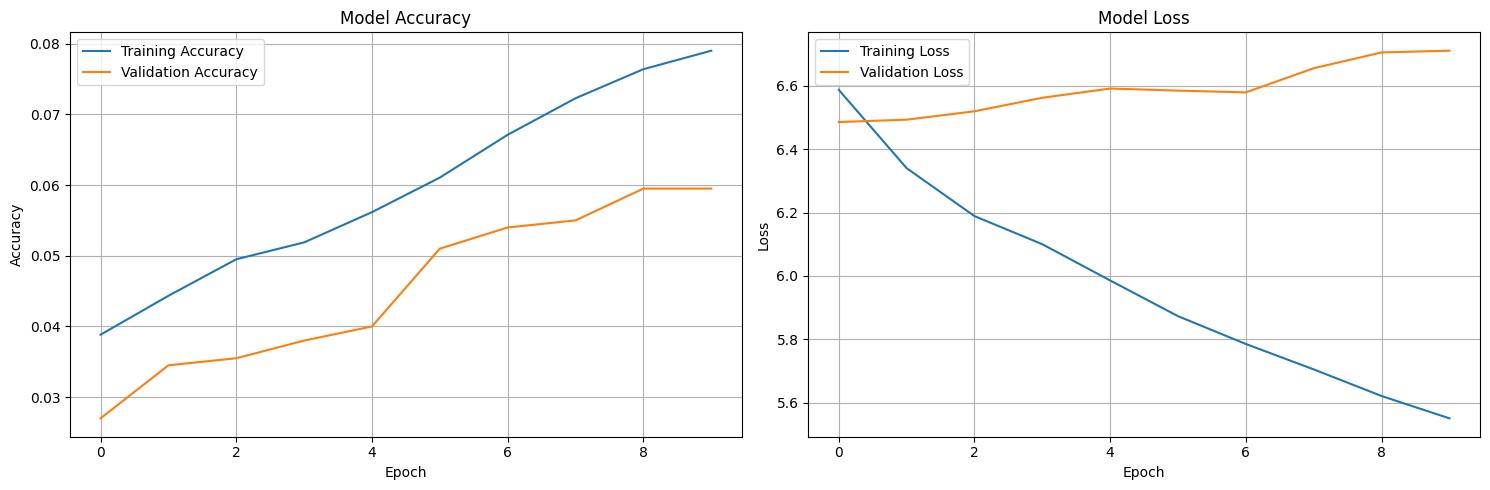

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Experiment 5.3

Import Necessary Libraries

In [2]:
import json
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Load the Dataset

In [3]:
# Import required libraries
import pandas as pd
import json
from tensorflow.keras.datasets import imdb

# Load IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Get the word index
word_index = imdb.get_word_index()

# Create reverse word index for decoding
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode reviews to text
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Create DataFrame for training data
train_data = {
    'review': [decode_review(x) for x in X_train],
    'sentiment': y_train
}
df_train = pd.DataFrame(train_data)

# Create DataFrame for test data
test_data = {
    'review': [decode_review(x) for x in X_test],
    'sentiment': y_test
}
df_test = pd.DataFrame(test_data)

# Check the first few rows and columns
print("Training Data:")
print(df_train.head())
print("\nColumns:", df_train.columns)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data:
                                              review  sentiment
0  ? this film was just brilliant casting locatio...          1
1  ? big hair big boobs bad music and a giant saf...          0
2  ? this has to be one of the worst films of the...          0
3  ? the ? ? at storytelling the traditional sort...          1
4  ? worst mistake of my life br br i picked this...          0

Columns: Index(['review', 'sentiment'], dtype='object')


Clean the Text Data

In [4]:
import re

def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s.,!?]', '', text)  # Keep basic punctuation for sentiment
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function to the review column
df_train['review'] = df_train['review'].apply(clean_text)
df_test['review'] = df_test['review'].apply(clean_text)

# Check cleaned text
print("Sample cleaned reviews:")
print(df_train['review'].head())

Sample cleaned reviews:
0    ? this film was just brilliant casting locatio...
1    ? big hair big boobs bad music and a giant saf...
2    ? this has to be one of the worst films of the...
3    ? the ? ? at storytelling the traditional sort...
4    ? worst mistake of my life br br i picked this...
Name: review, dtype: object


Tokenize the Text

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize tokenizer with a vocabulary size limit
tokenizer = Tokenizer(num_words=10000)  # Limit to top 10000 most frequent words

# Fit tokenizer on training data only
tokenizer.fit_on_texts(df_train['review'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(df_train['review'])
test_sequences = tokenizer.texts_to_sequences(df_test['review'])

# Print vocabulary size and sample sequences
print("Vocabulary size:", len(tokenizer.word_index))
print("\nSample sequences from training data:")
print(train_sequences[:3])
print("\nSample sequences from test data:")
print(test_sequences[:3])

Vocabulary size: 9745

Sample sequences from training data:
[[11, 19, 13, 41, 522, 955, 1594, 1359, 62, 451, 4378, 63, 3867, 1, 169, 34, 251, 2, 22, 98, 41, 825, 108, 47, 659, 6, 33, 472, 280, 2, 147, 1, 168, 108, 163, 330, 378, 37, 1, 168, 4444, 1088, 14, 538, 36, 10, 440, 1, 189, 47, 13, 3, 144, 1986, 16, 11, 19, 1, 1877, 4512, 462, 1, 19, 66, 84, 9, 13, 41, 522, 36, 73, 12, 10, 1224, 1, 19, 14, 508, 14, 9, 13, 616, 15, 2, 59, 379, 9, 5, 310, 5, 103, 2, 1, 2189, 5124, 13, 472, 63, 3710, 31, 1, 126, 9, 13, 36, 608, 2, 22, 120, 48, 34, 131, 44, 22, 1387, 31, 3, 19, 9, 211, 25, 74, 49, 2, 11, 401, 13, 79, 5, 1, 104, 113, 903, 12, 251, 1, 4, 3679, 2, 711, 34, 66, 41, 522, 467, 23, 393, 311, 43, 4, 1, 1013, 10, 102, 85, 1, 374, 12, 292, 95, 30, 2033, 53, 23, 137, 3, 191, 7284, 15, 1, 222, 19, 18, 130, 467, 23, 472, 2, 140, 27, 5392, 15, 48, 34, 25, 220, 89, 22, 102, 1, 222, 62, 13, 36, 1310, 85, 9, 13, 279, 2, 13, 4379, 109, 100, 30, 12, 13, 5230, 16, 174, 30], [191, 1133, 191, 7964, 75, 

Pad Sequences

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set maximum sequence length (you can adjust this value)
max_len = 200  # Common length for movie reviews

# Pad sequences for both training and test data
X_train = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# Print shapes and sample padded sequences
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("\nSample padded sequence from training data:")
print(X_train[0])

Training data shape: (25000, 200)
Test data shape: (25000, 200)

Sample padded sequence from training data:
[  11   19   13   41  522  955 1594 1359   62  451 4378   63 3867    1
  169   34  251    2   22   98   41  825  108   47  659    6   33  472
  280    2  147    1  168  108  163  330  378   37    1  168 4444 1088
   14  538   36   10  440    1  189   47   13    3  144 1986   16   11
   19    1 1877 4512  462    1   19   66   84    9   13   41  522   36
   73   12   10 1224    1   19   14  508   14    9   13  616   15    2
   59  379    9    5  310    5  103    2    1 2189 5124   13  472   63
 3710   31    1  126    9   13   36  608    2   22  120   48   34  131
   44   22 1387   31    3   19    9  211   25   74   49    2   11  401
   13   79    5    1  104  113  903   12  251    1    4 3679    2  711
   34   66   41  522  467   23  393  311   43    4    1 1013   10  102
   85    1  374   12  292   95   30 2033   53   23  137    3  191 7284
   15    1  222   19   18  130  467   23

Prepare Labels (Sarcasm vs. Non-Sarcasm)

In [7]:
# Extract labels (1 for positive sentiment, 0 for negative sentiment)
y_train = df_train['sentiment'].values
y_test = df_test['sentiment'].values

# Print sample labels and distribution
print("Sample training labels:", y_train[:5])
print("\nLabel distribution in training set:")
print("Positive reviews:", sum(y_train == 1))
print("Negative reviews:", sum(y_train == 0))
print("\nLabel distribution in test set:")
print("Positive reviews:", sum(y_test == 1))
print("Negative reviews:", sum(y_test == 0))

Sample training labels: [1 0 0 1 0]

Label distribution in training set:
Positive reviews: 12500
Negative reviews: 12500

Label distribution in test set:
Positive reviews: 12500
Negative reviews: 12500


Split the Data into Training and Testing Sets

In [8]:
# Create validation split from training data
from sklearn.model_selection import train_test_split

# Create validation set from training data
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42
)

# Check the shapes of all data splits
print(f"Training data shape: {X_train_final.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

# Verify class distribution in each split
print("\nClass distribution:")
print(f"Training set - Positive: {sum(y_train_final == 1)}, Negative: {sum(y_train_final == 0)}")
print(f"Validation set - Positive: {sum(y_val == 1)}, Negative: {sum(y_val == 0)}")
print(f"Test set - Positive: {sum(y_test == 1)}, Negative: {sum(y_test == 0)}")

Training data shape: (20000, 200)
Validation data shape: (5000, 200)
Test data shape: (25000, 200)

Class distribution:
Training set - Positive: 9937, Negative: 10063
Validation set - Positive: 2563, Negative: 2437
Test set - Positive: 12500, Negative: 12500


Build the LSTM Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Build the model
model = Sequential([
    # Embedding layer with increased dimensions
    Embedding(input_dim=vocab_size, output_dim=256, input_length=max_len),
    Dropout(0.3),

    # Bidirectional LSTM layers
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.3),

    Bidirectional(LSTM(128)),
    Dropout(0.3),

    # Dense layers
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'AUC']
)

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=1,
    min_lr=0.0001
)

# Train the model with optimized parameters
history = model.fit(
    X_train_final,
    y_train_final,
    epochs=5,                # Reduced epochs
    batch_size=128,         # Increased batch size
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1090s 7s/step - AUC: 0.6541 - accuracy: 0.6096 - loss: 0.6422 - val_AUC: 0.8566 - val_accuracy: 0.7982 - val_loss: 0.4731 - learning_rate: 0.0010
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1099s 7s/step - AUC: 0.8372 - accuracy: 0.7732 - loss: 0.4958 - val_AUC: 0.7799 - val_accuracy: 0.6848 - val_loss: 0.5625 - learning_rate: 0.0010
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1103s 7s/step - AUC: 0.8448 - accuracy: 0.7641 - loss: 0.4853 - val_AUC: 0.8662 - val_accuracy: 0.7836 - val_loss: 0.4657 - learning_rate: 2.0000e-04
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1094s 7s/step - AUC: 0.8973 - accuracy: 0.8229 - loss: 0.4038 - val_AUC: 0.8909 - val_accuracy: 0.8160 - val_loss: 0.4316 - learning_rate: 2.0000e-04
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1116s 7s/step - AUC: 0.9185 - accuracy: 0.8516 - loss: 0.3617 - val_AUC: 0.8856 - val_accuracy: 0.7886 - val_loss: 0.4975 - learning_rate: 2.0000e-04


Evaluate the Model

782/782 ━━━━━━━━━━━━━━━━━━━━ 516s 659ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.84      0.81     12500
    Positive       0.83      0.76      0.79     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



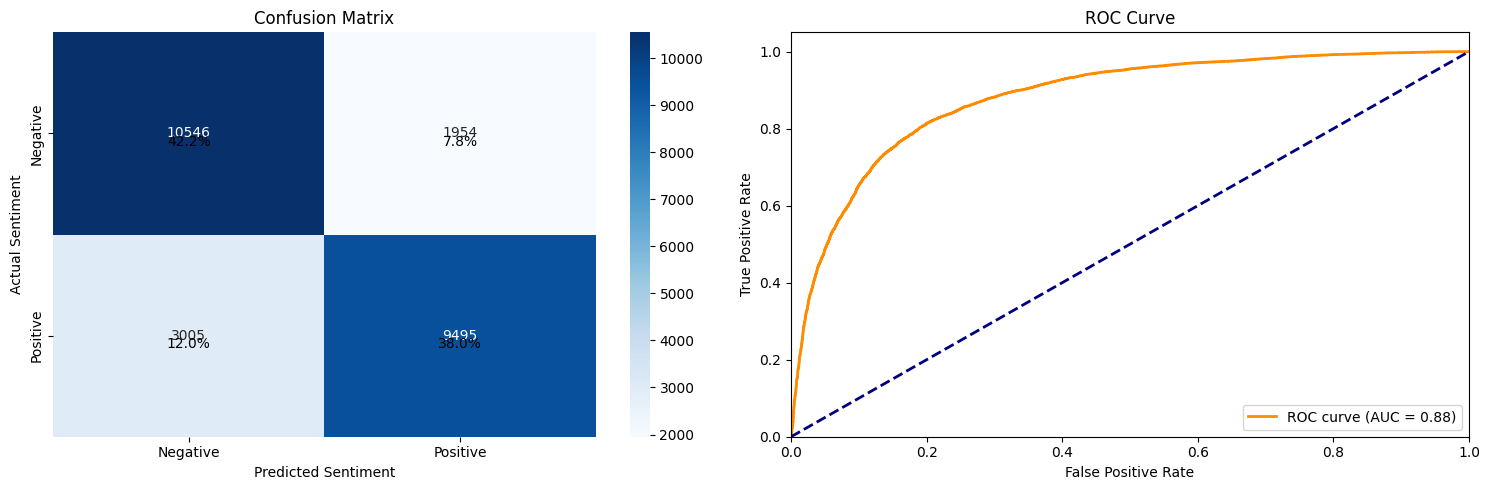

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions and probabilities
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Print detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Create figure with subplots
plt.figure(figsize=(15, 5))

# 1. Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.title("Confusion Matrix")

# Add percentage labels
total = np.sum(cm)
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'\n{cm[i,j]/total*100:.1f}%',
                ha='center', va='center')

# 2. ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Visualize Training Performance

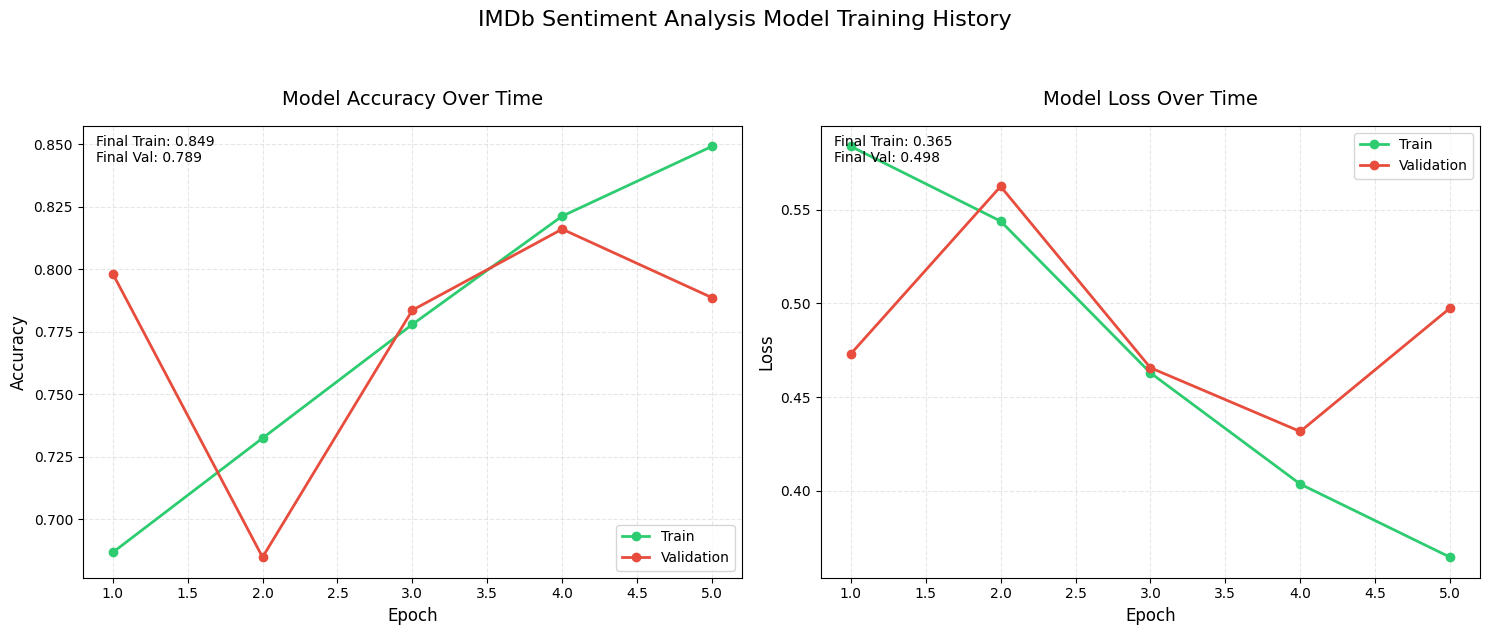

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Set custom style
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True

# Accuracy plot
epochs = range(1, len(history.history['accuracy']) + 1)
ax1.plot(epochs, history.history['accuracy'], color='#2ecc71', label='Train', linewidth=2, marker='o')
ax1.plot(epochs, history.history['val_accuracy'], color='#e74c3c', label='Validation', linewidth=2, marker='o')
ax1.set_title("Model Accuracy Over Time", pad=15, fontsize=14)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=10, loc='lower right')

# Add final accuracy values
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
ax1.text(0.02, 0.98, f'Final Train: {final_train_acc:.3f}\nFinal Val: {final_val_acc:.3f}',
         transform=ax1.transAxes, verticalalignment='top', fontsize=10)

# Loss plot
ax2.plot(epochs, history.history['loss'], color='#2ecc71', label='Train', linewidth=2, marker='o')
ax2.plot(epochs, history.history['val_loss'], color='#e74c3c', label='Validation', linewidth=2, marker='o')
ax2.set_title("Model Loss Over Time", pad=15, fontsize=14)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Loss", fontsize=12)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(fontsize=10, loc='upper right')

# Add final loss values
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
ax2.text(0.02, 0.98, f'Final Train: {final_train_loss:.3f}\nFinal Val: {final_val_loss:.3f}',
         transform=ax2.transAxes, verticalalignment='top', fontsize=10)

plt.suptitle('IMDb Sentiment Analysis Model Training History', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# Save high-quality plot
plt.savefig('imdb_training_history.png', dpi=300, bbox_inches='tight')

Prediction on Real Time data


In [17]:
def preprocess_text(text, tokenizer, max_len):
    # Clean the text first
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s.,!?]', '', text)  # Keep basic punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    # Tokenize and pad
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    return padded

# Example usage:
sample_review = "This movie was fantastic! The acting was superb."
processed_review = preprocess_text(sample_review, tokenizer, max_len)
prediction = model.predict(processed_review)[0][0]
print(f"Sentiment Score: {prediction:.2f} ({'Positive' if prediction > 0.5 else 'Negative'})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Sentiment Score: 0.99 (Positive)


In [18]:
def predict_sentiment(text):
    processed = preprocess_text(text, tokenizer, max_len)
    prediction = model.predict(processed)[0][0]
    label = "Positive 👍" if prediction >= 0.5 else "Negative 👎"
    confidence = prediction if prediction >= 0.5 else 1 - prediction

    print(f"\nReview: {text}")
    print(f"Sentiment Score: {prediction:.4f}")
    print(f"Confidence: {confidence:.2%}")
    print(f"Verdict: {label}")

    return prediction

# Example usage:
reviews = [
    "This movie was absolutely brilliant!",
    "Complete waste of time and money.",
    "It was okay, nothing special."
]

for review in reviews:
    predict_sentiment(review)
    print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

Review: This movie was absolutely brilliant!
Sentiment Score: 0.9918
Confidence: 99.18%
Verdict: Positive 👍
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step

Review: Complete waste of time and money.
Sentiment Score: 0.8589
Confidence: 85.89%
Verdict: Positive 👍
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step

Review: It was okay, nothing special.
Sentiment Score: 0.9882
Confidence: 98.82%
Verdict: Positive 👍
--------------------------------------------------


In [19]:
# Test different types of movie reviews
predict_sentiment("The special effects were incredible and the story kept me on the edge of my seat!")

predict_sentiment("This movie was a complete disaster. Poor acting and terrible script.")

predict_sentiment("While it had some good moments, overall the film was rather disappointing.")

predict_sentiment("The director clearly didn't understand the source material. What a waste.")

predict_sentiment("I can't believe how amazing this film was! Oscar-worthy performances!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step

Review: The special effects were incredible and the story kept me on the edge of my seat!
Sentiment Score: 0.9832
Confidence: 98.32%
Verdict: Positive 👍
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

Review: This movie was a complete disaster. Poor acting and terrible script.
Sentiment Score: 0.1116
Confidence: 88.84%
Verdict: Negative 👎
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

Review: While it had some good moments, overall the film was rather disappointing.
Sentiment Score: 0.9870
Confidence: 98.70%
Verdict: Positive 👍
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step

Review: The director clearly didn't understand the source material. What a waste.
Sentiment Score: 0.6081
Confidence: 60.81%
Verdict: Positive 👍
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step

Review: I can't believe how amazing this film was! Oscar-worthy performances!
Sentiment Score: 0.9884
Confidence: 98.84%
Verdict: Positive 👍


np.float32(0.9883612)